In [1]:

with open('./medicine_v2.txt') as f:
    medicine = f.readlines()
medicine = [name.split('\n')[0] for name in medicine]
medicine = list(set(medicine))


In [2]:
medicine = [name.split('\n')[0] for name in medicine]

In [3]:
medicine = list(set(medicine))
len(medicine)

179853

In [5]:
import cv2
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import random
import time 
import numpy as np
import skimage
import os 

from PIL import Image,ImageDraw,ImageFont,ImageEnhance,ImageFilter
%matplotlib inline

origin_images = glob.glob('./blank_region/*.jpg')
font = ImageFont.truetype('./font/Songti.ttc',20,index=6)
# font = ['./font/华文细黑.ttf','./font/Songti.ttc','./font/STHeitiLight.ttc']
save_dir = '/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/train/images/medicine_dataset_v1/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
font_dir = ['./font/STHeitiLight.ttc','./font/Songti.ttc','./font/Hiragino Sans GB.ttc']


In [6]:
origin_images

['./blank_region/20180908_image_00313.jpg',
 './blank_region/20180908_image_00289.jpg',
 './blank_region/20180908_image_00185.jpg',
 './blank_region/20180908_image_00171.jpg',
 './blank_region/20180908_image_00090.jpg',
 './blank_region/20180908_image_00082.jpg',
 './blank_region/20180908_image_00069.jpg',
 './blank_region/20180908_image_00064 2.jpg']

In [7]:
font_dir = ['./font/Songti.ttc','./font/华文细黑.ttf']
# font_dir = ['./font/STHeitiLight.ttc']


def SaltAndPepper(src,percetage):  
    SP_NoiseImg=src 
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1]) 
    for i in range(SP_NoiseNum): 
        randX=np.random.randint(0,src.shape[0]-1) 
        randY=np.random.randint(0,src.shape[1]-1) 
        if np.random.randint(0,1)==0: 
            SP_NoiseImg[randX,randY]=0 
        else: 
            SP_NoiseImg[randX,randY]=255 
    return SP_NoiseImg

def image_enhance(img):
    
    flag1 = random.random()
    if flag1 > 0.3:
        img = ImageEnhance.Contrast(img).enhance(random.random()/2+0.8)
        img = ImageEnhance.Brightness(img).enhance(random.random()/1.5+0.75)
        flag2 = random.random()
        if flag2 > 0.5:
            for _ in range(random.randint(0,4)):
                img = ImageEnhance.Sharpness(img).enhance(0.01)
#                 print('sharp one')
        elif flag2 > 0.3:
            for _ in range(random.randint(0,3)):
                img = img.filter(ImageFilter.SMOOTH_MORE)
#                 print('smooth one')
    return img



def gen_text_randomSize(item):
    fontName= random.choice(font_dir)
    fontSize= random.randint(18,21)
    len_item = len(item.strip())
    origin_images = glob.glob('./blank_region/*.jpg')
    if fontName == './font/Songti.ttc':
        index = 6
    else:
        index = 0
#     print(fontName,fontSize)
    font = ImageFont.truetype(font=fontName,size=fontSize,index=index)
    img = cv2.imread(random.choice(origin_images))
    image = img.copy()
    h,w = img.shape[:2]
    blank = random.choice([2,2,2,2,2,50,80])
    text_h,text_w = random.randint(fontSize+3,fontSize+7),(fontSize)*len_item+1+blank
    if random.random() > 0.7:
        text_h,text_w = random.randint(fontSize+3,fontSize+7),(fontSize)*len_item+1+blank+80
    h_chop = h-text_h
    w_chop = w-text_w
#     print(h,w,text_h,text_w,blank)
    x = np.random.randint(w_chop)
    y = np.random.randint(h_chop)
    image = image[y:y+text_h,x:x+text_w]

    flag = random.random()
    if flag >0.7:
        image = skimage.util.random_noise(image,mode='gaussian',var=0.002)
        image = np.uint8(image*255)
    

#     print(image.shape)
    img_PIL = Image.fromarray(image[:,:,::-1])
    draw = ImageDraw.Draw(img_PIL)
    draw.text((blank,-1),item,font=font,fill=(0,0,0))
    
    img_PIL = image_enhance(img_PIL)
    
    with open(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.txt', "w", encoding='utf-8') as f:
        f.write(item)
    img_PIL.save(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.png') 
    return img_PIL

In [20]:
import keys_keras
character = keys_keras.alphabet_union[:]
%time items_num = [random.randint(0,len(character)-16) for _ in range(5000)]
items = [''.join(random.sample(character,20)) for _ in range(20000)]

# %time items = [character[i:i+15] for i in items_num ]

CPU times: user 16.4 ms, sys: 271 µs, total: 16.7 ms
Wall time: 16.2 ms


In [24]:
def chop_to_10(text,characters):
    assert type(text) is str
    length = len(text)
    if length > 10 :
        start = random.randint(0,length-10)
        return text[start:start+10]
    elif length == 10:
        return text
    else:
        return text+''.join(random.sample(characters,10-length))

In [41]:
chop_10_list = [chop_to_10(item,characters=character) for item in medicine]

In [ ]:
len_medicine = [len(item) for item in medicine]
np.sum(np.array(len_medicine) > 15)/len(medicine)
# len(medicine)


In [ ]:
from multiprocessing import Pool,cpu_count
pool = Pool(cpu_count()//2)
# items1 = random.sample([item for item in medicine if len(item) >= 15],3000)
items2 = [item+' ※' for item in random.sample(medicine,50)]
# items = items1+items2
random.shuffle(items)
# print(len(items))
items = random.sample(medicine,3000)
items =  items+items2
random.shuffle(items)

# items = [item for item in medicine if len(item) >= 15]
# items = random.sample(medicine,20000)
# items = [''.join(random.sample(character,25)) for _ in range(10000)]

start = time.time()
%time result = pool.map(gen_text_randomSize,items)
end = time.time()
print(end-start,cpu_count()//2)



In [ ]:
items = [item for item in medicine if len(item) < 15]
len(items)


In [ ]:

import concurrent.futures

# start = time.time()
with concurrent.futures.ProcessPoolExecutor() as executor:
    start = time.time()
    executor.map(gen_text_randomSize,items)
end = time.time()
print(end-start)

CPU times: user 186 ms, sys: 110 ms, total: 296 ms
Wall time: 294 ms


(273, 23)

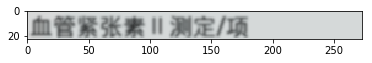

In [63]:
# import keys_keras
%time result = gen_text_randomSize(random.choice(chop_10_list))
# k = random.randint(0,5)

# result = image_enhance(result)
#  result = ImageEnhance.Contrast(result).enhance(0.5)

# result = ImageEnhance.Brightness(result).enhance(1.5)

# for i in range(k):
#     result = result.filter(ImageFilter.SMOOTH_MORE)
# img_list = glob.glob('../data/train_competition_gen_20_v2/*.png')

# result = Image.open(random.choice(items2))
plt.imshow(result)
result.size

In [ ]:
def gen_text(item,fontName='./font/Songti.ttc',fontSize=20):
    len_item = len(item)
    origin_images = glob.glob('./blank_region/*.jpg')
    if fontName == './font/Songti.ttc':
        index = 6
    else:
        index = 0
#     print(fontName,index)
    font = ImageFont.truetype(font=fontName,size=fontSize,index=index)
    img = cv2.imread(random.choice(origin_images))
    image = img.copy()
    h,w = img.shape[:2]
    blank = random.choice([5,15,25,50,80])
    text_h,text_w = 32,(fontSize+5)*len_item+1+blank
    h_chop = h-text_h
    w_chop = w-text_w
#     print(h,w,text_h,text_w,blank)
    x = np.random.randint(w_chop)
    y = np.random.randint(h_chop)
    image = image[y:y+text_h,x:x+text_w]
#     print(image.shape)
    img_PIL = Image.fromarray(image[:,:,::-1])
    
    draw = ImageDraw.Draw(img_PIL)
    draw.text((blank,25-fontSize),item,font=font,fill=(0,0,0))
    with open(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.txt', "w", encoding='utf-8') as f:
        f.write(item)
    img_PIL.save(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.png') 
    return img_PIL

def genImage(label, fontsize, color=(0, 0, 0),fontName="./font/Songti.ttc"):
    img = Image.new("RGB", ((int)(fontsize * 1.2 * len(label)), (int)(fontsize * 2)), (255, 255, 255))
    font = ImageFont.truetype(fontName, fontsize)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), label, fill=color, font=font)
    with open("../data/dataline/" + label + "-" + str(fontsize) + ".txt", "w", encoding='utf-8') as f:
        f.write(label)
    img.save("../data/dataline/" + label + "-" + str(fontsize) + ".png")

    


In [ ]:
font_dir = ['./font/STHeitiLight.ttc','./font/Songti.ttc','./font/Hiragino Sans GB.ttc']
fontName = random.choice(font_dir)
fontSize = random.randint(15,25)
print(fontName,fontSize)
img = gen_text('深静脉导管',fontName=fontName,fontSize=fontSize)

In [ ]:
font_dir = ['./font/STHeitiLight.ttc','./font/Songti.ttc','./font/Hiragino Sans GB.ttc','./font/华文细黑.ttf']

def genImage_random(label, fontsize, color=(0, 0, 0),fontName="./font/Songti.ttc"):
    img = Image.new("RGB", ((int)(fontsize * 1.2 * len(label)), (int)(fontsize * 2)), (255, 255, 255))
    font = ImageFont.truetype(fontName, fontsize)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), label, fill=color, font=font)
    with open("../data/dataline/" + label + "-" + str(fontsize) + ".txt", "w", encoding='utf-8') as f:
        f.write(label)
    img.save("../data/dataline/" + label + "-" + str(fontsize) + ".jpg")
    return img 

In [ ]:
txt_file = glob.glob('../data/valid_v3_replace/*.png')

In [ ]:
import keys_keras
charater = keys_keras.alphabet[:]
medicine = u''.join(medicine)
union = set(charater) | set(medicine)
lack_diff = set(union)- set(charater)

In [ ]:
len(lack_diff)

In [ ]:
draw = ImageDraw.Draw(result[0])
draw.text((0,0),'sfa',font=font)

In [ ]:
np.random.randint(-10,10,result[0].size)

In [ ]:
import glob
img_file = glob.glob('../data/train_random_char/*png')
len(img_file)

In [ ]:
img_file[:10]

In [ ]:
img = genImage('随便红烧豆腐',20,fontName='./font/华文细黑.ttf')

In [ ]:
img.size
plt.imshow(img)

In [ ]:
item

In [ ]:
import glob
imgs = glob.glob('../data/train_competition_add_num_v3/*txt')
len(imgs)

In [ ]:
len(imgs)